In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
data=pd.read_csv("/content/Training.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2455,3,126,88,41,235,39.3,0.704,27,0
2456,4,123,62,0,0,32.0,0.226,35,1
2457,1,80,74,11,60,30.0,0.527,22,0
2458,1,96,64,27,87,33.2,0.289,21,0


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome
0    1500
1     960
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

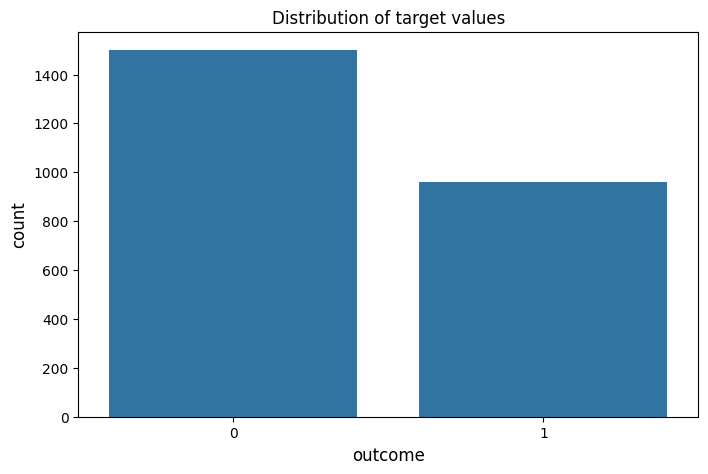

In [7]:
print(data['Outcome'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x=data['Outcome'])
plt.xlabel("outcome",size=12)
plt.ylabel("count",size=12)
plt.title("Distribution of target values", size = 12)

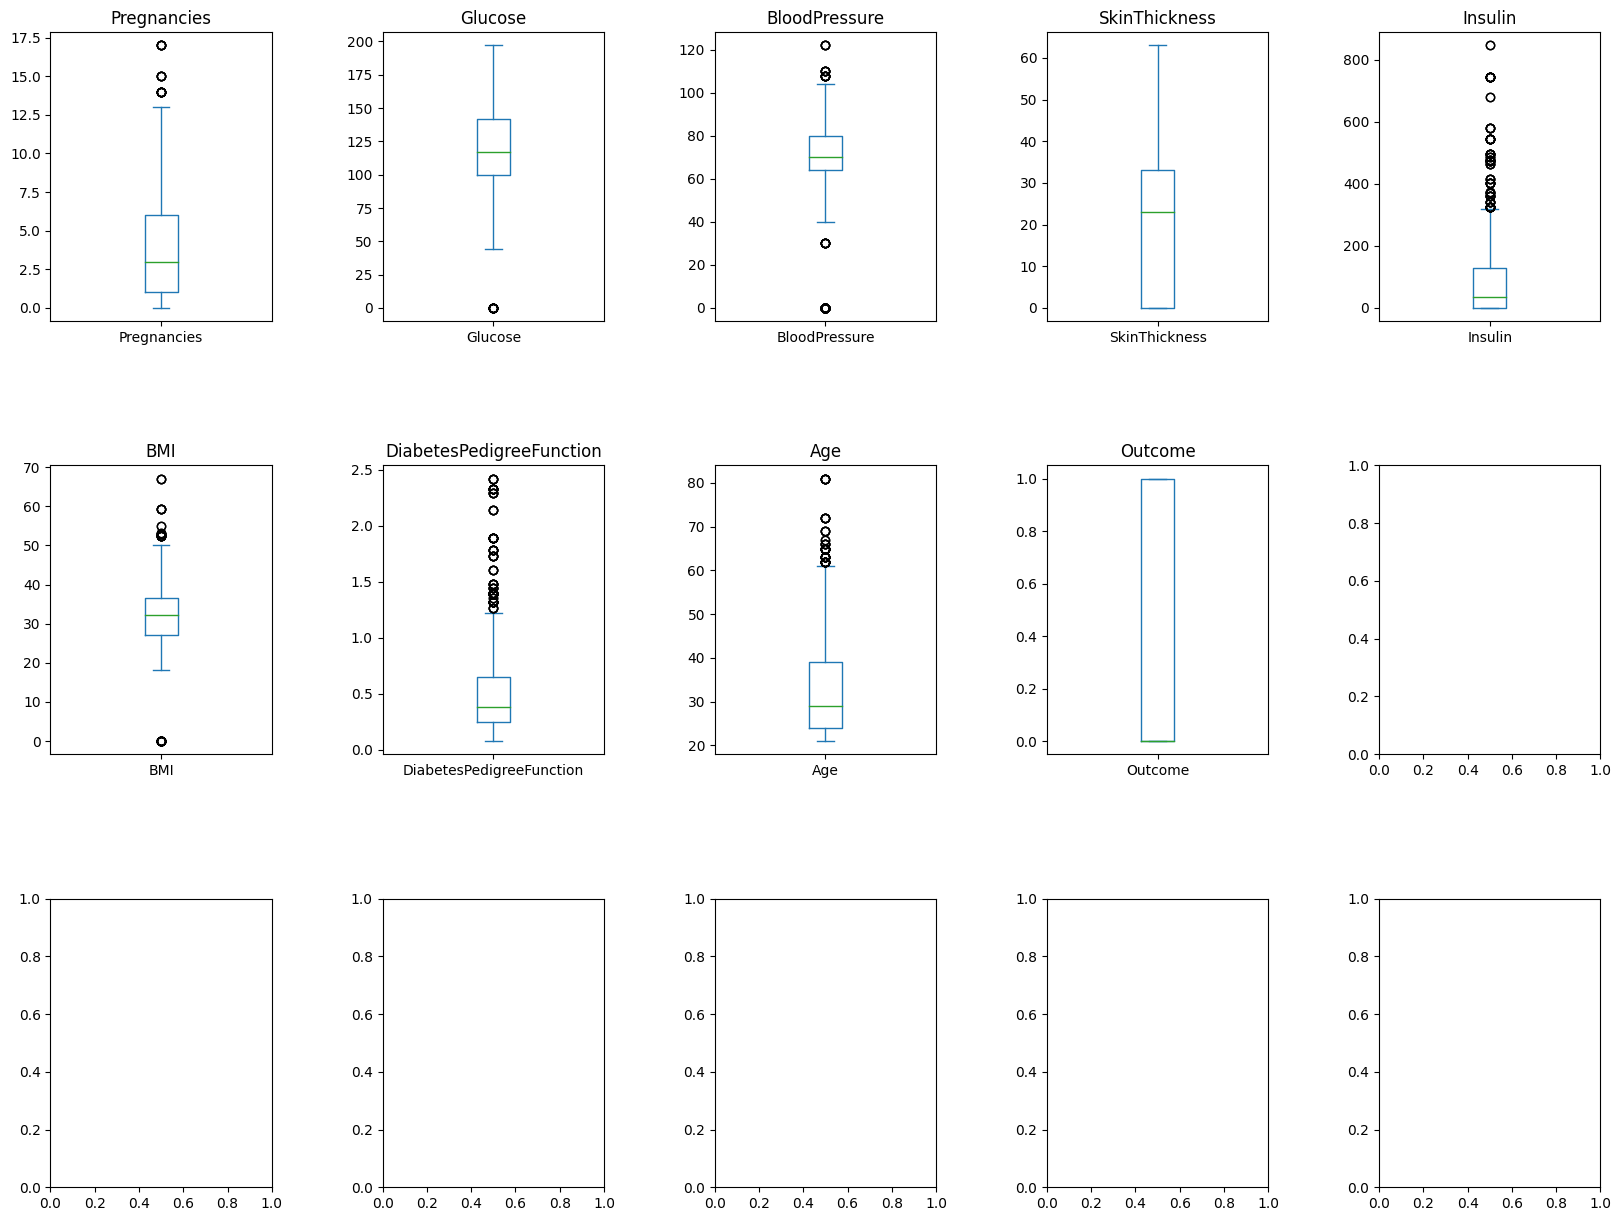

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, col in enumerate(data.columns):
    row_index = i // 5
    col_index = i % 5
    data[col].plot(kind='box', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)

plt.show()

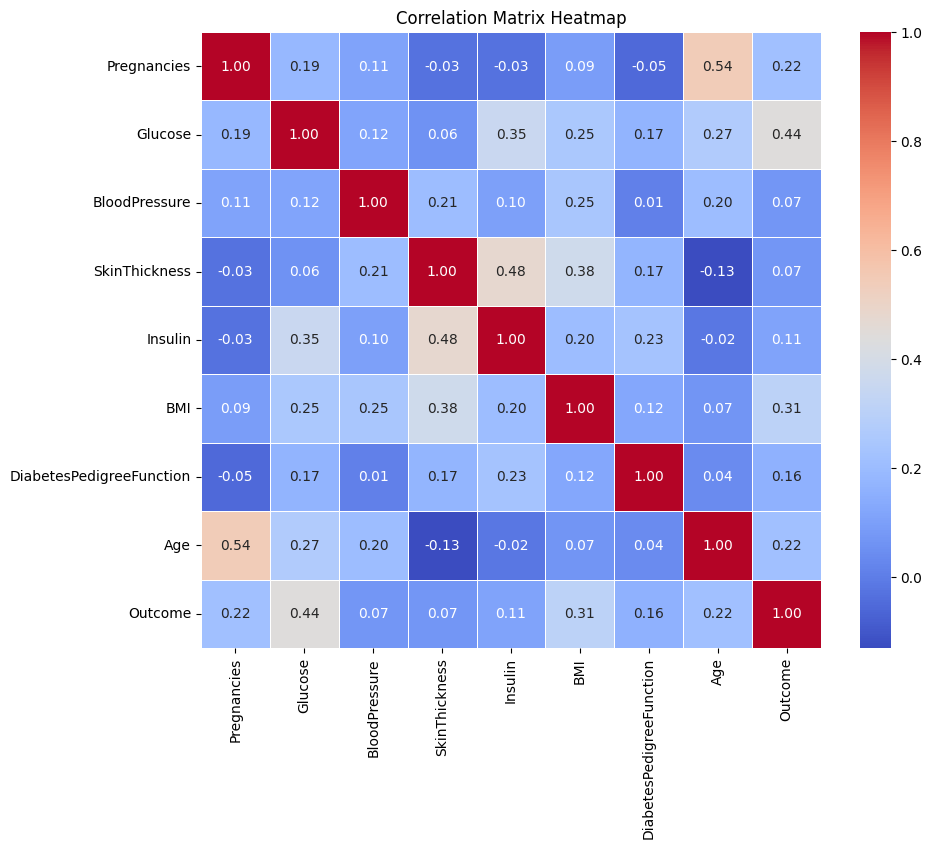

In [10]:
corr = data.corr()

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
rel = corr['Outcome'].sort_values(ascending = False)
rel

Outcome                     1.000000
Glucose                     0.440045
BMI                         0.308345
Pregnancies                 0.218263
Age                         0.217349
DiabetesPedigreeFunction    0.160543
Insulin                     0.109022
SkinThickness               0.071114
BloodPressure               0.069604
Name: Outcome, dtype: float64

In [15]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = SVC(kernel='linear')


clf.fit(X_train, y_train)


score = clf.score(X_test, y_test)
print('Accuracy:', score)

Accuracy: 0.7276422764227642


In [19]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)

print(svm_score)


0.7276422764227642


In [17]:
l = []
maxi = 0
ind = 0
best = 0
best_predict = 0
for i in range (4, 40):
    kcla = KNeighborsClassifier(n_neighbors = i)
    kcla.fit(X_train, y_train)
    predict = kcla.predict(X_test)
    acu = accuracy_score(predict, y_test)
    l.append(acu)
    if maxi < acu :
        maxi = acu
        ind = i
        best = acu
        best_predict = predict

Accuracy using K Nearest Neighbors is: 97.15447154471545 %


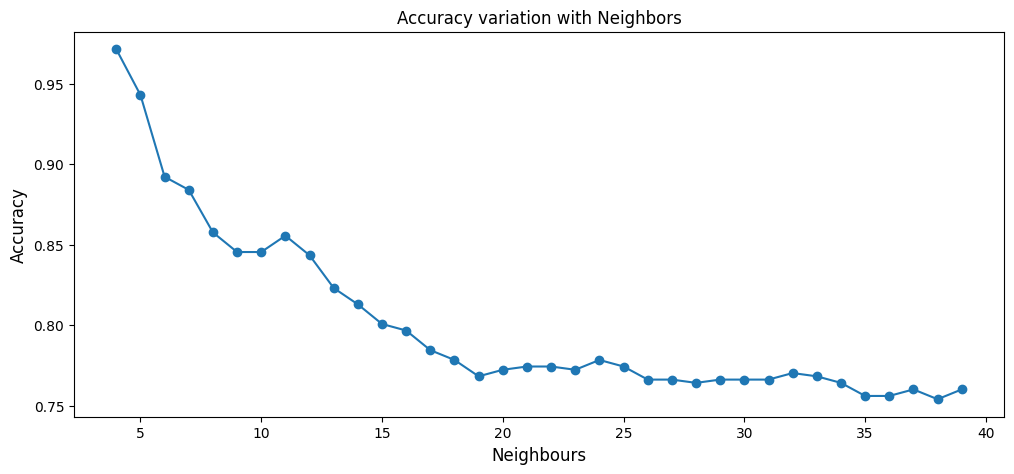

In [18]:
plt.figure(figsize = (12,5))
plt.plot(range (4, 40), l, marker = 'o')
plt.xlabel('Neighbours', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with Neighbors', size = 12)
print("Accuracy using K Nearest Neighbors is: {} %".format(best*100))

In [21]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_score = dt_model.score(X_test, y_test)
print(dt_score)


1.0


In [23]:
best = 0
esti = 0
best_predict = 0
l = []
for i in range (20, 110):
    rcla = RandomForestClassifier(n_estimators = i)
    rcla.fit(X_train, y_train)
    predict = rcla.predict(X_test)
    acu = accuracy_score(predict, y_test)
    l.append(acu)
    if best < acu:
        best = acu
        best_predict = predict


Accuracy using Random Forest is: 100.0 %


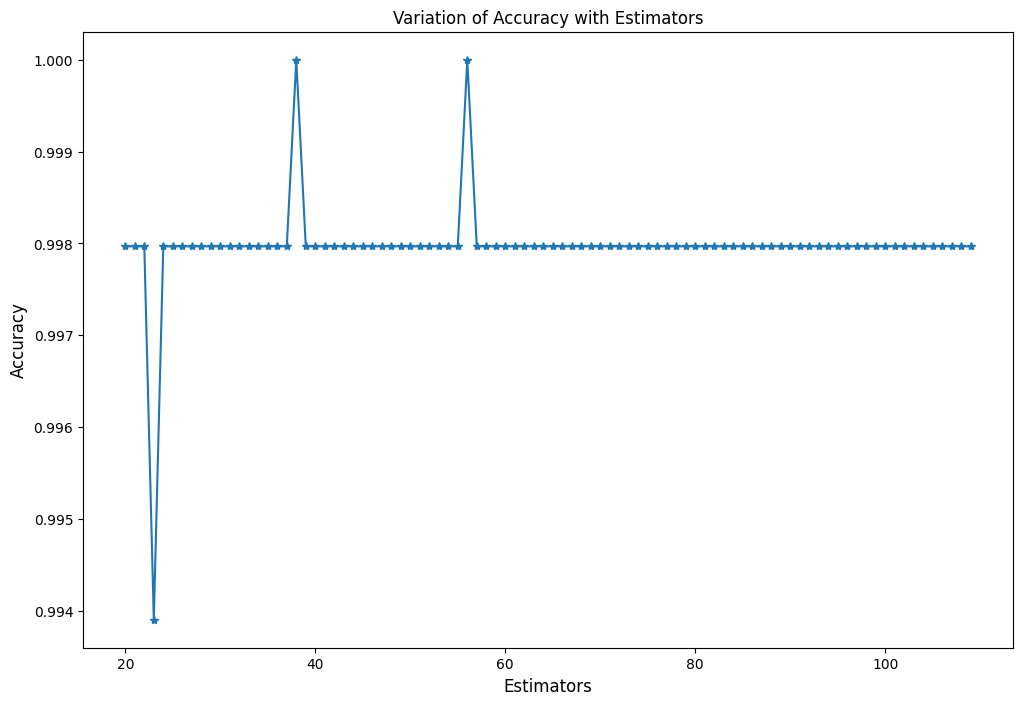

In [24]:
plt.figure(figsize = (12,8))
plt.plot(range (20 ,110), l, marker = "*")
plt.xlabel("Estimators", size = 12)
plt.ylabel("Accuracy", size = 12)
plt.title("Variation of Accuracy with Estimators", size = 12)
print("Accuracy using Random Forest is: {} %".format(best*100))

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=9000)

lr.fit(X_train, y_train)

score = lr.score(X_test, y_test)
print('Accuracy:', score)


Accuracy: 0.7296747967479674
